In [27]:
import pandas as pd
import numpy as np
import re
import sys
import nltk
from nltk.corpus import stopwords, sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import collections
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from textblob import Word
from textblob import TextBlob
import seaborn as sns
from nltk.stem import PorterStemmer

In [28]:
df1 = pd.read_csv('/Users/famnindo/Documents/Data Science/Thesis/data/seamless_googleplay(1).csv',skiprows=1)
df1.head()

,Date,AppID,AppName,Language,Review Language,Version,VersionCode,OS,Author,Rating,...,Categories,Semantic Tags,Semantic Categories,Semantic Sentiment,Notes,Likes,Dislikes,Link,Permalink,AF Link
0,19/7/2014 21:10,com.seamlessweb.android.view,NaN,th,en,NaN,NaN,NaN,Noon Journey ชีวิตคือการเดินทาง,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://play.google.com/console/u/0/developer/...,https://appfollow.io/gp/112278/review/22603822...,https://watch.appfollow.io/apps/my-first-works...
1,27/5/2016,com.seamlessweb.android.view,NaN,en,en,NaN,NaN,NaN,Jaime Munoz,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://play.google.com/console/u/0/developer/...,https://appfollow.io/gp/112278/review/55798987...,https://watch.appfollow.io/apps/my-first-works...
2,27/5/2016,com.seamlessweb.android.view,NaN,en,en,NaN,NaN,NaN,Karen Hom,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://play.google.com/console/u/0/developer/...,https://appfollow.io/gp/112278/review/55798988...,https://watch.appfollow.io/apps/my-first-works...
3,27/5/2016,com.seamlessweb.android.view,NaN,en,en,NaN,NaN,NaN,Wilbert Nigel Christie,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://play.google.com/console/u/0/developer/...,https://appfollow.io/gp/112278/review/55798989...,https://watch.appfollow.io/apps/my-first-works...
4,27/5/2016,com.seamlessweb.android.view,NaN,en,en,NaN,NaN,NaN,amanda whitley,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://play.google.com/console/u/0/developer/...,https://appfollow.io/gp/112278/review/55798990...,https://watch.appfollow.io/apps/my-first-works...


In [29]:
df1 = df1[['Review','Rating']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7288 entries, 0 to 7287
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7288 non-null   object
 1   Rating  7288 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 114.0+ KB


In [30]:
df2 = pd.read_csv('/Users/famnindo/Documents/Data Science/Thesis/data/seamless_itunes.csv',skiprows=1)
df2.head()

,Date,AppID,AppName,Country,Review Language,Version,Author,Rating,Title,Review,...,Categories,Semantic Tags,Semantic Categories,Semantic Sentiment,Notes,Likes,Dislikes,Link,Permalink,AF Link
0,24/9/2017,381840917,NaN,us,en,4.31.1,I've got a crush on you!,4,Addictive!,Be careful what you wish for. This convenient ...,...,NaN,NaN,NaN,NaN,NaN,3.0,1.0,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/50238/review/98348066...,https://watch.appfollow.io/apps/my-first-works...
1,27/10/2017,381840917,NaN,us,en,4.31.1,Margaret Moore,1,Truly the worst food delivery app out there - ...,Seamless is truly the worst food delivery app ...,...,NaN,NaN,NaN,NaN,NaN,6.0,4.0,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/50238/review/98348063...,https://watch.appfollow.io/apps/my-first-works...
2,10/11/2017,381840917,NaN,us,en,4.34,KickLish,5,Love this app. Reliable. Amazing customer serv...,Seamless is the best. I have been using this p...,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/50238/review/98348064...,https://watch.appfollow.io/apps/my-first-works...
3,30/11/2017,381840917,NaN,us,en,4.34.1,Harakirijasper,1,Used to work,Seamless used to be our go-to-app. Sadly thei...,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/50238/review/98348065...,https://watch.appfollow.io/apps/my-first-works...
4,15/12/2017,381840917,NaN,us,en,4.35,DERP the hero,2,Good app with one HUGE flaw,Seamless is an extremely streamlined and acces...,...,NaN,NaN,NaN,NaN,NaN,9.0,10.0,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/50238/review/98348062...,https://watch.appfollow.io/apps/my-first-works...


In [31]:
df2 = df2[['Review','Rating']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2875 non-null   object
 1   Rating  2875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.0+ KB


In [32]:
df3 = pd.concat([df1,df2], axis=0)

In [33]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df3.head(20)

,Review,Rating
0,Benyapha T.,5
1,I only wish more establishments partnered with...,5
2,Great app,5
3,This app makes life so freaking easy! Never ha...,5
4,Glitches suck,2
5,Works,5
6,"They used to give codes, but not anymore. Will...",3
7,This app makes it whyyyyyyy too easy to be lazy!,5
8,So far so good but not all good !! Some places...,5
9,Makes everything easier,5


In [34]:
#lowercase
df3['text_preprocessing'] = df3['Review'].str.lower()
#remove punctuation, remove extra whitespace in string and on both sides of string
df3['text_preprocessing'] = df3['text_preprocessing'].str.replace("'", '').str.replace('[^\w\s]', ' ').str.replace(" \d+", " ").str.replace(' +', ' ').str.strip()

<ipython-input-34-93b8c08103c5>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['text_preprocessing'] = df3['text_preprocessing'].str.replace("'", '').str.replace('[^\w\s]', ' ').str.replace(" \d+", " ").str.replace(' +', ' ').str.strip()


In [35]:
# apply sentiment analysis
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in df3['text_preprocessing'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
df3['sentiment'] = sentiment_label_list
df3['sentiment score'] = sentiment_score_list

In [36]:
df3.head(30)

,Review,Rating,text_preprocessing,sentiment,sentiment score
0,Benyapha T.,5,benyapha t,Neutral,0.0000
1,I only wish more establishments partnered with...,5,i only wish more establishments partnered with...,Positive,0.7050
2,Great app,5,great app,Positive,0.6249
3,This app makes life so freaking easy! Never ha...,5,this app makes life so freaking easy never had...,Positive,0.7114
4,Glitches suck,2,glitches suck,Negative,-0.4404
5,Works,5,works,Neutral,0.0000
6,"They used to give codes, but not anymore. Will...",3,they used to give codes but not anymore will s...,Neutral,0.0000
7,This app makes it whyyyyyyy too easy to be lazy!,5,this app makes it whyyyyyyy too easy to be lazy,Positive,0.1027
8,So far so good but not all good !! Some places...,5,so far so good but not all good some places we...,Negative,-0.2973
9,Makes everything easier,5,makes everything easier,Positive,0.4215


<AxesSubplot:xlabel='sentiment', ylabel='count'>

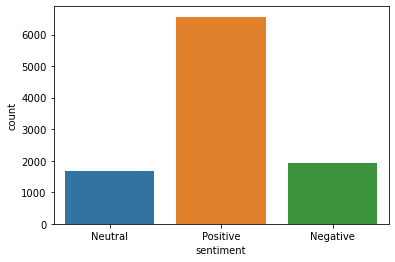

In [37]:
#Polarity rating count visualization
sns.countplot(x='sentiment',data=df3)

In [43]:
stop = stopwords.words('english')
df3['text_preprocessing'] = df3['text_preprocessing'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Lemmatiser
df3['Lemmatiser'] = df3['text_preprocessing'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Porters
from nltk.stem import PorterStemmer
st = PorterStemmer()
df3['Porterstemmer'] = df3['text_preprocessing'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df3.head()

,Review,Rating,text_preprocessing,sentiment,sentiment score,Lemmatiser,Porterstemmer
0,Benyapha T.,5,benyapha,Neutral,0.0000,benyapha,benyapha
1,I only wish more establishments partnered with...,5,wish establishments partnered options apply ne...,Positive,0.7050,wish establishment partnered option apply neat...,wish establish partner option appli neat app
2,Great app,5,great app,Positive,0.6249,great app,great app
3,This app makes life so freaking easy! Never ha...,5,app makes life freaking easy never problem great,Positive,0.7114,app make life freaking easy never problem great,app make life freak easi never problem great
4,Glitches suck,2,glitches suck,Negative,-0.4404,glitch suck,glitch suck


In [44]:
df3.to_csv('sentiment_score(seamless).csv')

In [54]:
df_pos = df3[df3['sentiment']=="Positive"]

In [60]:
df_neg = df3[df3['sentiment']=="Negative"]

In [58]:
top_N = 300
data = df_pos['Lemmatiser'].str.cat(sep=' ')
words =nltk.tokenize.word_tokenize(data)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word_Lemmatiser', 'Frequency'])

In [59]:
rslt

,Word_Lemmatiser,Frequency
0,app,2548
1,great,1534
2,order,1516
3,food,1499
4,seamless,1294
...,...,...
295,easily,39
296,extremely,39
297,month,39
298,enjoy,38


In [61]:
rslt.to_csv('word_pos_Lemmatiser(seamless).csv')

In [63]:
top_N = 300
data = df_neg['Lemmatiser'].str.cat(sep=' ')
words =nltk.tokenize.word_tokenize(data)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word_Porterstemmer', 'Frequency'])

In [64]:
rslt.to_csv('word_neg_Lemmatiser(seamless).csv')

## ----------